In [1]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the dataset into a pandas dataframe, df

In [3]:
# Read the dataset into a dataframe
df = pd.read_csv('/content/drive/MyDrive/Softcom/Train_Data.csv', sep=',', engine='python')
df_test = pd.read_csv('/content/drive/MyDrive/Softcom/Test_Data.csv', sep=',', engine='python')

**Drop Non Recquired Columns**



In [4]:
df

,mfccs,zero_crossing_rate,spectral_bandwidth,chroma,rms,class_label,file_name,mfcc0,mfcc1,mfcc2,...,mfcc30,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39
0,[-4.7883154e+02 3.3325115e+01 -6.4487829e+00 ...,0.158221,2811.724720,0.432150,0.029986,Angry,03-01-03-02-01-01-01.wav,-478.83154,33.325115,-6.448783,...,0.328626,2.993545,1.607269,0.753363,0.795460,0.657204,0.285984,0.347409,0.218164,-0.362225
1,[-4.8954865e+02 2.7738764e+01 -1.2382742e+01 ...,0.337466,2627.283008,0.583449,0.011966,Angry,03-01-03-02-01-01-01_augmented.wav,-489.54865,27.738764,-12.382742,...,3.152687,3.479581,0.999255,0.446273,-0.756348,-0.987419,-0.684020,-0.347724,-0.050397,-0.133484
2,[-4.35193085e+02 4.40335197e+01 -2.84056549e+...,0.287352,2173.834795,0.537973,0.050250,Angry,03-01-03-02-01-01-02.wav,-435.19308,44.033520,-28.405655,...,-0.770171,-0.912993,-0.610560,-1.106990,-0.785358,-0.564920,-0.417357,0.537306,0.718312,0.528304
3,[-4.5051022e+02 3.5520393e+01 -2.6201200e+01 ...,0.319214,2375.562237,0.547021,0.025544,Angry,03-01-03-02-01-01-02_augmented.wav,-450.51022,35.520393,-26.201200,...,0.600577,0.524650,0.813930,-1.485857,0.499522,-0.771937,0.126429,0.860468,0.581919,1.637959
4,[-4.7573129e+02 2.5805241e+01 -1.5824142e+01 ...,0.154203,2169.616633,0.471881,0.046953,Angry,03-01-03-02-01-01-04.wav,-475.73130,25.805240,-15.824142,...,-1.276900,-2.355503,2.545179,-1.319387,0.711873,0.455794,-1.546776,0.536169,-0.651819,0.355566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851,[-4.0630850e+02 3.8935593e+01 4.7740480e-01 ...,0.251618,2595.763125,0.489838,0.039640,Surprise,M_10_EVAN_S_9_SURPRISE_3_augmented.wav,-406.30850,38.935593,0.477405,...,-0.671915,-0.215386,0.026275,0.219410,-0.046814,-2.131241,-2.373210,-1.189148,1.648045,1.386102
16852,[-3.3170786e+02 4.6200230e+01 3.0691259e+00 ...,0.337181,2410.996505,0.389710,0.117963,Surprise,M_10_EVAN_S_9_SURPRISE_4.wav,-331.70786,46.200230,3.069126,...,2.917920,2.602964,0.847366,0.522375,-0.207175,0.567925,0.032568,-0.259393,0.193821,1.031203
16853,[-3.7679736e+02 4.1225876e+01 5.9078252e-01 ...,0.247278,2594.630202,0.492712,0.052451,Surprise,M_10_EVAN_S_9_SURPRISE_4_augmented.wav,-376.79736,41.225876,0.590782,...,1.994877,1.314048,1.387961,0.246608,1.195332,-0.975989,-0.565488,0.153799,1.977247,1.530025
16854,[-3.2025311e+02 4.7039799e+01 2.6084688e-01 ...,0.333771,2389.176638,0.392537,0.123277,Surprise,M_10_EVAN_S_9_SURPRISE_5.wav,-320.25310,47.039800,0.260847,...,2.386777,2.104635,0.633636,0.841800,0.382966,0.831771,-0.528826,-0.969811,-0.152325,0.219692


In [5]:
df_test

,mfccs,zero_crossing_rate,spectral_bandwidth,chroma,rms,class_label,file_name,mfcc0,mfcc1,mfcc2,...,mfcc30,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39
0,[-3.9012119e+02 4.4109344e+01 -1.2921607e+01 ...,0.084918,2010.457276,0.467693,0.075098,Angry,03-01-03-02-01-01-03.wav,-390.12120,44.109344,-12.921607,...,0.450648,2.404330,2.840697,4.679700,3.358691,2.829290,2.049688,-0.031819,1.511454,1.466245
1,[-4.67160522e+02 2.91869411e+01 -1.70986462e+...,0.391429,2372.973040,0.412228,0.035136,Angry,03-01-03-02-01-01-14.wav,-467.16052,29.186941,-17.098646,...,2.546051,-0.345007,1.761566,0.331160,-0.264679,-0.082578,-0.519460,-0.226637,-2.060637,-0.626951
2,[-3.4629849e+02 2.0243580e+01 -1.1391698e+01 ...,0.120882,2457.125273,0.414273,0.125970,Angry,03-01-03-02-01-01-30.wav,-346.29850,20.243580,-11.391698,...,1.983120,2.254916,-0.430221,0.366129,-0.073306,-0.460280,0.677957,1.134820,-1.294887,0.309249
3,[-3.9613730e+02 4.1812637e+01 -1.2806710e+01 ...,0.149057,2480.510451,0.512132,0.080969,Angry,03-01-03-02-01-02-25.wav,-396.13730,41.812637,-12.806710,...,5.819712,1.589295,0.174151,-1.593609,1.364120,1.444026,0.774227,0.248576,-1.265227,0.026068
4,[-4.08084534e+02 3.21562920e+01 -1.13426485e+...,0.128189,2642.601731,0.450778,0.046662,Angry,03-01-03-02-01-03-01.wav,-408.08453,32.156292,-11.342648,...,-1.079431,2.334728,-0.123283,0.738071,-1.139498,-0.480123,1.070031,0.191624,1.218494,1.468383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,[-3.15789490e+02 4.11579781e+01 -4.66505718e+...,0.368006,2421.570717,0.378931,0.104968,Surprise,M_10_EVAN_S_5_SURPRISE_3.wav,-315.78950,41.157978,-4.665057,...,1.781141,2.212446,0.255170,0.355328,-0.191172,0.538170,-0.836946,-0.600881,-0.154892,-0.400183
935,[-3.0825998e+02 4.2420658e+01 -3.6246645e+00 ...,0.344019,2396.946955,0.391811,0.113606,Surprise,M_10_EVAN_S_5_SURPRISE_4.wav,-308.25998,42.420660,-3.624665,...,1.077347,1.734812,-0.640567,0.225346,-0.893579,0.445937,-0.518387,1.034477,1.081573,0.678320
936,[-2.97977112e+02 3.52298622e+01 -1.60021079e+...,0.375373,2483.153256,0.394186,0.136011,Surprise,M_10_EVAN_S_6_SURPRISE_2.wav,-297.97710,35.229862,-1.600211,...,-0.261475,1.704446,0.119918,2.339397,0.122162,0.819136,0.680564,0.174210,-0.836902,-0.645632
937,[-3.0559796e+02 3.6652721e+01 -9.1293299e-01 ...,0.360817,2486.361872,0.385032,0.128843,Surprise,M_10_EVAN_S_6_SURPRISE_5.wav,-305.59796,36.652720,-0.912933,...,-0.964675,1.582144,0.123939,1.008998,-0.414467,1.555154,1.006149,0.085300,0.355210,1.037921


In [ ]:
       """   'zero_crossing_rate',
                'spectral_bandwidth',
                #'chroma',
                'rms',
                'mfcc0',
                'mfcc1',
                'mfcc2',
                'mfcc3',
                'mfcc4',
                'mfcc5',
                'mfcc6',
                'mfcc7',
                'mfcc8',
                'mfcc9',
                'mfcc10',
                'mfcc11',
                'mfcc12',
                'mfcc13',
                'mfcc14',
                'mfcc15',
                'mfcc16',
                'mfcc17',
                'mfcc18',
                'mfcc19',
                'mfcc20',
                  'mfcc21',
                    'mfcc22',
                      'mfcc23',
                         'mfcc24',
                           'mfcc25',
                             'mfcc26',
                               'mfcc27',
                                 'mfcc28',
                                   'mfcc29',
                                     'mfcc30',
                                       'mfcc31',
                                         'mfcc32',
                                           'mfcc33',
                                               'mfcc34',
                                                 'mfcc35',
                                                   'mfcc36',
                                                     'mfcc37',
                                                       'mfcc38',
                                                         'mfcc39',
                """

"   'zero_crossing_rate',\n         'spectral_bandwidth',\n         #'chroma',\n         'rms',\n         'mfcc0',\n         'mfcc1',\n         'mfcc2',\n         'mfcc3',\n         'mfcc4',\n         'mfcc5',\n         'mfcc6',\n         'mfcc7',\n         'mfcc8',\n         'mfcc9',\n         'mfcc10',\n         'mfcc11',\n         'mfcc12',\n         'mfcc13',\n         'mfcc14',\n         'mfcc15',\n         'mfcc16',\n         'mfcc17',\n         'mfcc18',\n         'mfcc19',\n         'mfcc20',\n           'mfcc21',\n             'mfcc22',\n               'mfcc23',\n                  'mfcc24',\n                    'mfcc25',\n                      'mfcc26',\n                        'mfcc27',\n                          'mfcc28',\n                            'mfcc29',\n                              'mfcc30',\n                                'mfcc31',\n                                  'mfcc32',\n                                    'mfcc33',\n                                        '

In [6]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
cols_to_drop=['file_name',
              'mfccs',
              'spectral_bandwidth',

            #'zero_crossing_rate',

            'chroma',
              'rms',


                'mfcc0',
                'mfcc1',
                'mfcc2',
                'mfcc3',
                'mfcc4',
                'mfcc5',
                'mfcc6',
                'mfcc7',
                'mfcc8',
                'mfcc9',
                'mfcc10',
                'mfcc11',
                'mfcc12',
                'mfcc13',
                'mfcc14',
                'mfcc15',
                'mfcc16',
                'mfcc17',
                'mfcc18',
                'mfcc19',
                'mfcc20',
                  'mfcc21',
                    'mfcc22',
                      'mfcc23',
                         'mfcc24',
                           'mfcc25',
                             'mfcc26',
                               'mfcc27',
                                 'mfcc28',
                                   'mfcc29',
                                     'mfcc30',
                                       'mfcc31',
                                         'mfcc32',
                                           'mfcc33',
                                               'mfcc34',
                                                 'mfcc35',
                                                   'mfcc36',
                                                     'mfcc37',
                                                       'mfcc38',
                                                         'mfcc39',
              ]

df = df.drop(cols_to_drop, axis=1)



df_test = df_test.drop(cols_to_drop, axis=1)

In [7]:
df_test

,zero_crossing_rate,class_label
0,0.084918,Angry
1,0.391429,Angry
2,0.120882,Angry
3,0.149057,Angry
4,0.128189,Angry
...,...,...
934,0.368006,Surprise
935,0.344019,Surprise
936,0.375373,Surprise
937,0.360817,Surprise


**Label Mapping**


In [9]:
import pandas as pd

# Sample DataFrame

# Anger, Disgust, Fear, Happiness, Neutral, Sadness and Surprise
# Define a dictionary to map old labels to new labels
label_mapping = {'Happy': '0','Surprise': '1','Angry': '2','Sad': '3','Fear': '4','Disgust': '5','Neutral': '6' }

# Use the map method to change class labels
df['class_label'] = df['class_label'].replace(label_mapping)
df_test['class_label'] = df_test['class_label'].replace(label_mapping)
# Display the updated DataFrame
print(df)
print(df_test)

       zero_crossing_rate class_label
0                0.158221           2
1                0.337466           2
2                0.287352           2
3                0.319214           2
4                0.154203           2
...                   ...         ...
16851            0.251618           1
16852            0.337181           1
16853            0.247278           1
16854            0.333771           1
16855            0.235671           1

[16856 rows x 2 columns]
     zero_crossing_rate class_label
0              0.084918           2
1              0.391429           2
2              0.120882           2
3              0.149057           2
4              0.128189           2
..                  ...         ...
934            0.368006           1
935            0.344019           1
936            0.375373           1
937            0.360817           1
938            0.372584           1

[939 rows x 2 columns]


In [10]:
# Seperate the dataframe into X and y data
X = df.values
y = df['class_label'].values

# Delete the Survived column from X
X=df.drop('class_label', axis=1).values

# separate X and y for validation




Vx=df_test.values
Vy=df_test['class_label'].values
Vx= df_test.drop('class_label', axis=1).values









In [13]:
print(Vx)

[[0.08491834]
 [0.39142943]
 [0.1208824 ]
 [0.14905696]
 [0.12818895]
 [0.13148612]
 [0.18807938]
 [0.11876904]
 [0.03222656]
 [0.07275391]
 [0.26135706]
 [0.08260361]
 [0.14608673]
 [0.09660484]
 [0.17394282]
 [0.25108754]
 [0.11932996]
 [0.19089026]
 [0.14601445]
 [0.04428677]
 [0.49677136]
 [0.06993114]
 [0.08554616]
 [0.23495946]
 [0.07708356]
 [0.06940303]
 [0.10013493]
 [0.07353292]
 [0.07161707]
 [0.13613356]
 [0.08578468]
 [0.10775734]
 [0.06550796]
 [0.09092468]
 [0.08890819]
 [0.09286289]
 [0.09197951]
 [0.08678733]
 [0.15064408]
 [0.12043028]
 [0.13210058]
 [0.14645828]
 [0.15559772]
 [0.11082866]
 [0.05803838]
 [0.11460073]
 [0.09297099]
 [0.09665732]
 [0.25333939]
 [0.08381785]
 [0.30552095]
 [0.24051219]
 [0.29575813]
 [0.12107691]
 [0.25351057]
 [0.10855741]
 [0.27981602]
 [0.09386572]
 [0.21443124]
 [0.23350227]
 [0.33216314]
 [0.38104566]
 [0.32101246]
 [0.30976788]
 [0.36951883]
 [0.3723074 ]
 [0.40028619]
 [0.44549135]
 [0.46309102]
 [0.10853674]
 [0.10727034]
 [0.12

In [14]:
unique,count=np.unique(y,return_counts=True)
y_uniq_count={k:v for (k,v) in zip(unique,count)}
y_uniq_count

{'0': 2710, '1': 2350, '2': 2710, '3': 2710, '4': 1800, '5': 2160, '6': 2416}

Using SMOTE to OverSample Training Data Only


In [15]:
import numpy as np
from imblearn.over_sampling import SMOTE

# Assuming you have a dataset with features X and labels y


# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X = X.astype(np.float32)
y = y.astype(np.float32)
# Fit and transform the data
X,y = smote.fit_resample(X, y)




In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)


In [16]:
unique,count=np.unique(y,return_counts=True)
y_uniq_count={k:v for (k,v) in zip(unique,count)}
y_uniq_count

{0.0: 2710, 1.0: 2710, 2.0: 2710, 3.0: 2710, 4.0: 2710, 5.0: 2710, 6.0: 2710}

In [17]:
print(X.shape)
print(y.shape)
print(Vx.shape)
print(Vy.shape)

(18970, 1)
(18970,)
(939, 1)
(939,)


In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split


**Perform Classification Using Decision Tree Classifier**

0.9925144965735372
0.0
Accuracy =  0.14376996805111822
Precision =  0.14582769281825503
Recall =  0.14376996805111822
F1_Score =  0.1445542374057115


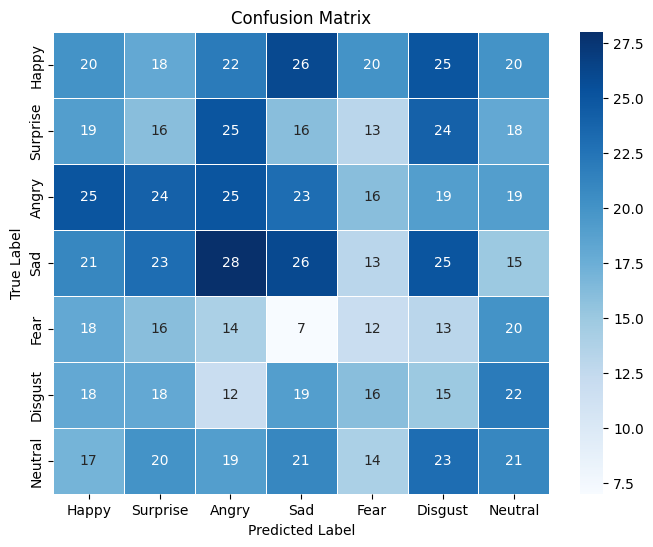

In [19]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=100,random_state=42,criterion='entropy',splitter='best')
dt_clf.fit(X, y)

print(dt_clf.score(X, y))
print(dt_clf.score(Vx, Vy))


prediction_test=dt_clf.predict(Vx)



Vy=Vy.astype('float32')
print("Accuracy = ",metrics.accuracy_score(Vy,prediction_test))
print("Precision = ",metrics.precision_score(Vy,prediction_test,average='weighted'))
print("Recall = ",metrics.recall_score(Vy,prediction_test,average='weighted'))
print("F1_Score = ",metrics.f1_score(Vy,prediction_test,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(Vy,prediction_test)

# Custom class labels
class_labels = ['Happy','Surprise','Angry','Sad','Fear','Disgust','Neutral']

# Display the confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




In [ ]:
print(Vx.shape)
print(Vy.shape)
print(X.shape)
print(y.shape)


(939, 3)
(939,)
(18970, 3)
(18970,)


**Perform Classification Using Random Forest Classifier**

Now, we would see if we could get a better results using the the Random Forests Classifier.

Accuracy =  0.1448349307774228
Precision =  0.14691745411926455
Recall =  0.1448349307774228
F1_Score =  0.1456241889809422


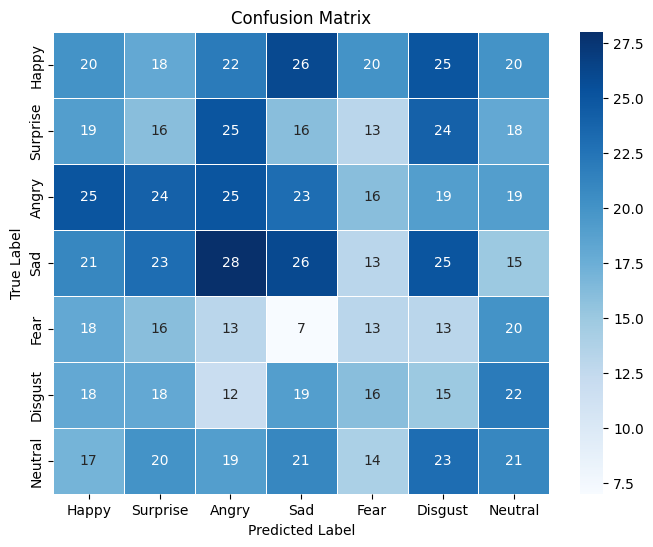

In [20]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100,random_state=42,max_features="sqrt")
rf_clf.fit(X, y)



prediction_test=rf_clf.predict(Vx)

Vy=Vy.astype('float32')
print("Accuracy = ",metrics.accuracy_score(Vy,prediction_test))
print("Precision = ",metrics.precision_score(Vy,prediction_test,average='weighted'))
print("Recall = ",metrics.recall_score(Vy,prediction_test,average='weighted'))
print("F1_Score = ",metrics.f1_score(Vy,prediction_test,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(Vy,prediction_test)

# Custom class labels
class_labels = ['Happy','Surprise','Angry','Sad','Fear','Disgust','Neutral']

# Display the confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Ada boost classifier


Accuracy =  0.134185303514377
Precision =  0.05820409851945007
Recall =  0.134185303514377
F1_Score =  0.05958186387860793


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


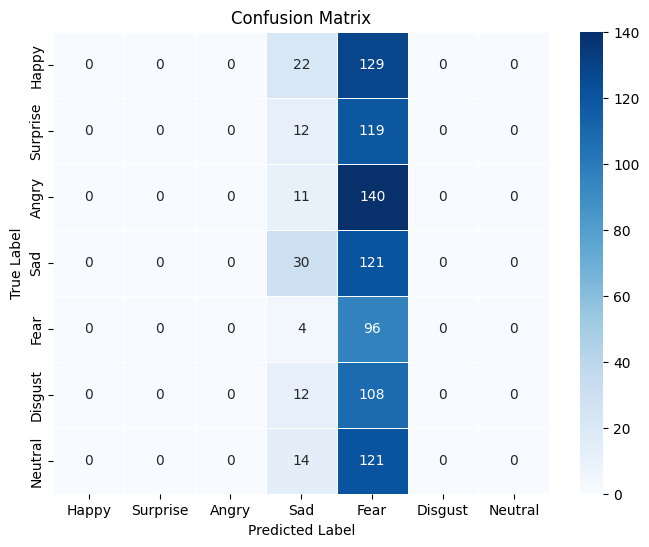

In [21]:
ada_clf = ensemble.AdaBoostClassifier(n_estimators=50,learning_rate=0.001,random_state=42)
ada_clf.fit(X, y)
ada_clf.score(Vx, Vy)




prediction_test=ada_clf.predict(Vx)

print("Accuracy = ",metrics.accuracy_score(Vy,prediction_test))
print("Precision = ",metrics.precision_score(Vy,prediction_test,average='weighted'))
print("Recall = ",metrics.recall_score(Vy,prediction_test,average='weighted'))
print("F1_Score = ",metrics.f1_score(Vy,prediction_test,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(Vy,prediction_test)

# Custom class labels
class_labels = ['Happy','Surprise','Angry','Sad','Fear','Disgust','Neutral']

# Display the confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Perform Classification Using Gradient Boosting Classifier**

This classifier is available in the ensemble module which we already imported. So we don’t need to import anything

0.14376996805111822
Accuracy =  0.16719914802981894
Precision =  0.1433831961877087
Recall =  0.16719914802981894
F1_Score =  0.14446112739192035


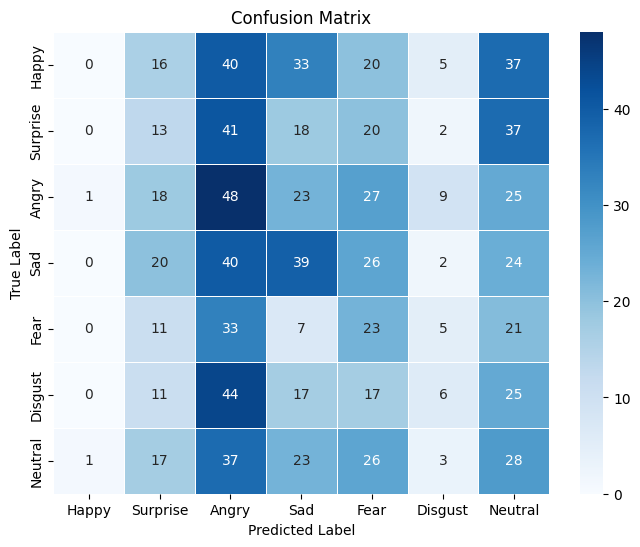

In [22]:
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=30,max_depth=5,max_features=2,learning_rate=0.001)
gb_clf.fit(X, y)
gb_clf.score(Vx,Vy)

print(dt_clf.score(Vx, Vy))


prediction_test=gb_clf.predict(Vx)

print("Accuracy = ",metrics.accuracy_score(Vy,prediction_test))
print("Precision = ",metrics.precision_score(Vy,prediction_test,average='weighted'))
print("Recall = ",metrics.recall_score(Vy,prediction_test,average='weighted'))
print("F1_Score = ",metrics.f1_score(Vy,prediction_test,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(Vy,prediction_test)

# Custom class labels
class_labels = ['Happy','Surprise','Angry','Sad','Fear','Disgust','Neutral']

# Display the confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

0.16080937167199147
Accuracy =  0.16080937167199147
Precision =  0.1652936047505133
Recall =  0.16080937167199147
F1_Score =  0.16203974665751295


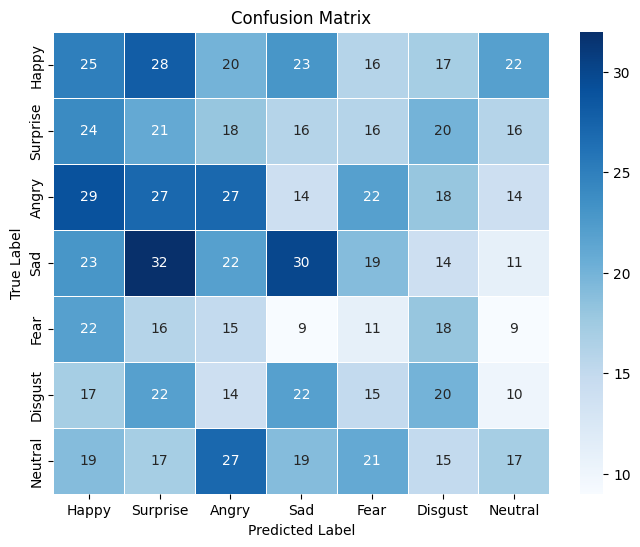

In [23]:

from sklearn.neighbors import KNeighborsClassifier

# create knn classifier
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X, y)
knn.score(X, y)

print(knn.score(Vx, Vy))


prediction_test=knn.predict(Vx)

print("Accuracy = ",metrics.accuracy_score(Vy,prediction_test))
print("Precision = ",metrics.precision_score(Vy,prediction_test,average='weighted'))
print("Recall = ",metrics.recall_score(Vy,prediction_test,average='weighted'))
print("F1_Score = ",metrics.f1_score(Vy,prediction_test,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(Vy,prediction_test)

# Custom class labels
class_labels = ['Happy','Surprise','Angry','Sad','Fear','Disgust','Neutral']

# Display the confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:


import joblib
joblib.dump(rf_clf, "rf_Zcr.joblib")


['rf_Zcr.joblib']

In [ ]:
import joblib
joblib.dump(dt_clf, "dt_Zcr.joblib")
joblib.dump(gb_clf, "rf_Zcr.joblib")
joblib.dump(knn, "rf_Zcr.joblib")
joblib.dump(rf_clf, "rf_Zcr.joblib")
joblib.dump(ada_clf, "rf_Zcr.joblib")

['dt_Zcr.joblib']

**LSTM,BI-LSTM model**

**Bi_lstm
**

Epoch 1/120
119/119 [==============================] - 12s 28ms/step - loss: 1.8917 - accuracy: 0.2127 - val_loss: 2.7706 - val_accuracy: 0.0000e+00
Epoch 2/120
119/119 [==============================] - 2s 14ms/step - loss: 1.8659 - accuracy: 0.2123 - val_loss: 2.7579 - val_accuracy: 0.0000e+00
Epoch 3/120
119/119 [==============================] - 3s 29ms/step - loss: 1.8659 - accuracy: 0.2159 - val_loss: 2.7364 - val_accuracy: 0.0000e+00
Epoch 4/120
119/119 [==============================] - 2s 13ms/step - loss: 1.8654 - accuracy: 0.2163 - val_loss: 2.7983 - val_accuracy: 0.0000e+00
Epoch 5/120
119/119 [==============================] - 2s 14ms/step - loss: 1.8647 - accuracy: 0.2143 - val_loss: 2.8541 - val_accuracy: 0.0000e+00
Epoch 6/120
119/119 [==============================] - 2s 16ms/step - loss: 1.8642 - accuracy: 0.2184 - val_loss: 2.7391 - val_accuracy: 0.0000e+00
Epoch 7/120
119/119 [==============================] - 2s 14ms/step - loss: 1.8637 - accuracy: 0.2161 - val_los

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy = 0.17252396166134185
Precision = 0.1365885319613047
Recall = 0.17252396166134185
F1 Score = 0.10463957011072333


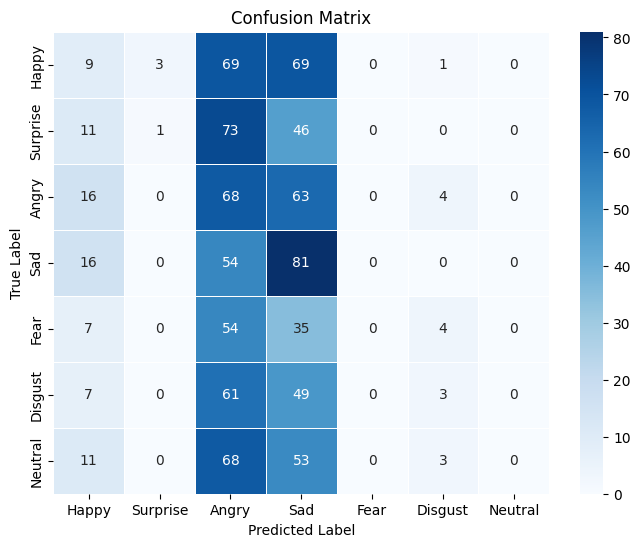

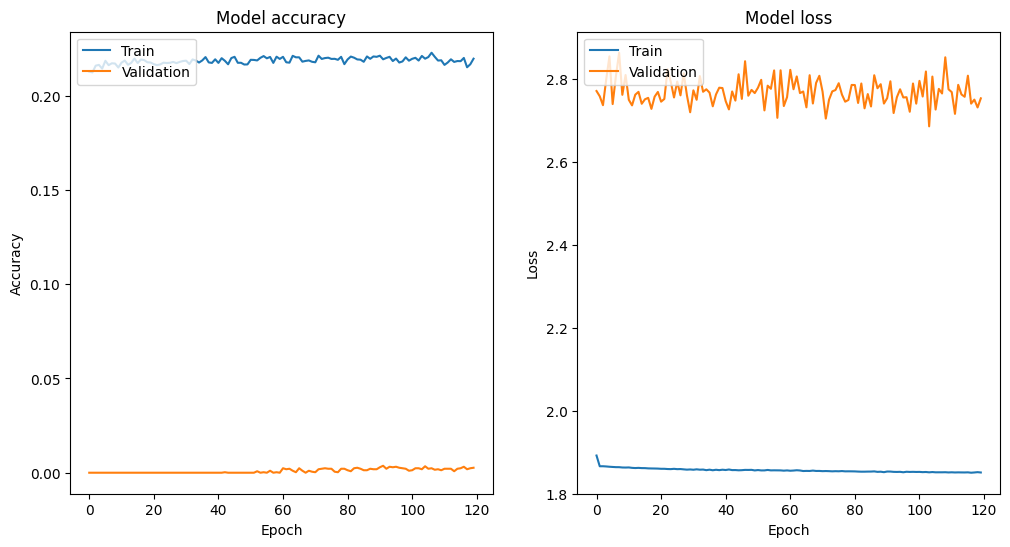

In [24]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.utils import to_categorical
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load training data



df_train = pd.read_csv('/content/drive/MyDrive/Softcom/Train_Data.csv', sep=',', engine='python')
df_test = pd.read_csv('/content/drive/MyDrive/Softcom/Test_Data.csv', sep=',', engine='python')

# Drop irrelevant columns

df_train = df_train.drop(cols_to_drop, axis=1)

# Class label mapping
label_mapping = {'Happy': 0, 'Surprise': 1, 'Angry': 2, 'Sad': 3, 'Fear': 4, 'Disgust': 5, 'Neutral': 6}
df_train['class_label'] = df_train['class_label'].replace(label_mapping)

# Separate features and labels for training
X_train = df_train.drop('class_label', axis=1).values
y_train = df_train['class_label'].values

# Apply SMOTE for class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# One-hot encode labels
y_categorical = to_categorical(y_resampled)

# Reshape features for BI-LSTM
X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))



# Drop irrelevant columns
df_test = df_test.drop(cols_to_drop, axis=1)

# Class label mapping
df_test['class_label'] = df_test['class_label'].replace(label_mapping)

# Separate features and labels for testing
X_test = df_test.drop('class_label', axis=1).values
y_test = df_test['class_label'].values

# Standardize features for testing
X_test_scaled = scaler.transform(X_test)
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# BI-LSTM Model
bilstm = Sequential()
bilstm.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))  # Set return_sequences=True
bilstm.add(Dropout(0.1))
bilstm.add(Bidirectional(LSTM(50)))  # This layer now receives 3D input as expected
bilstm.add(Dropout(0.1))




bilstm.add(Dense(y_categorical.shape[1], activation='softmax'))














bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])






# Train the model
history = bilstm.fit(X_reshaped, y_categorical, epochs=120, batch_size=128, validation_split=0.2)









# Evaluate the model on the test set
y_pred = bilstm.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred_classes)
precision = metrics.precision_score(y_test, y_pred_classes, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred_classes, average='weighted')
recall=metrics.recall_score(y_test, y_pred_classes, average='weighted')



print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", f1_score)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Custom class labels
class_labels = ['Happy', 'Surprise', 'Angry', 'Sad', 'Fear', 'Disgust', 'Neutral']

# Display the confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


***bi-lstm***


Epoch 1/120
119/119 [==============================] - 8s 20ms/step - loss: 1.9099 - accuracy: 0.2032 - val_loss: 2.6265 - val_accuracy: 0.0000e+00
Epoch 2/120
119/119 [==============================] - 2s 15ms/step - loss: 1.8699 - accuracy: 0.2069 - val_loss: 2.6999 - val_accuracy: 0.0000e+00
Epoch 3/120
119/119 [==============================] - 2s 16ms/step - loss: 1.8674 - accuracy: 0.2093 - val_loss: 2.7621 - val_accuracy: 0.0000e+00
Epoch 4/120
119/119 [==============================] - 1s 10ms/step - loss: 1.8683 - accuracy: 0.2157 - val_loss: 2.7295 - val_accuracy: 0.0000e+00
Epoch 5/120
119/119 [==============================] - 1s 9ms/step - loss: 1.8672 - accuracy: 0.2131 - val_loss: 2.7111 - val_accuracy: 0.0000e+00
Epoch 6/120
119/119 [==============================] - 1s 11ms/step - loss: 1.8660 - accuracy: 0.2156 - val_loss: 2.8000 - val_accuracy: 0.0000e+00
Epoch 7/120
119/119 [==============================] - 1s 11ms/step - loss: 1.8648 - accuracy: 0.2155 - val_loss:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy = 0.17678381256656017
Precision = 0.12346959296691339
Recall = 0.17678381256656017
F1 Score = 0.10728187530687777


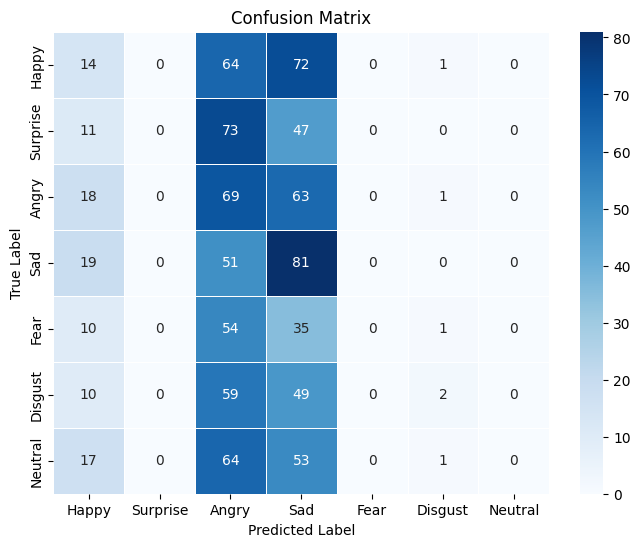

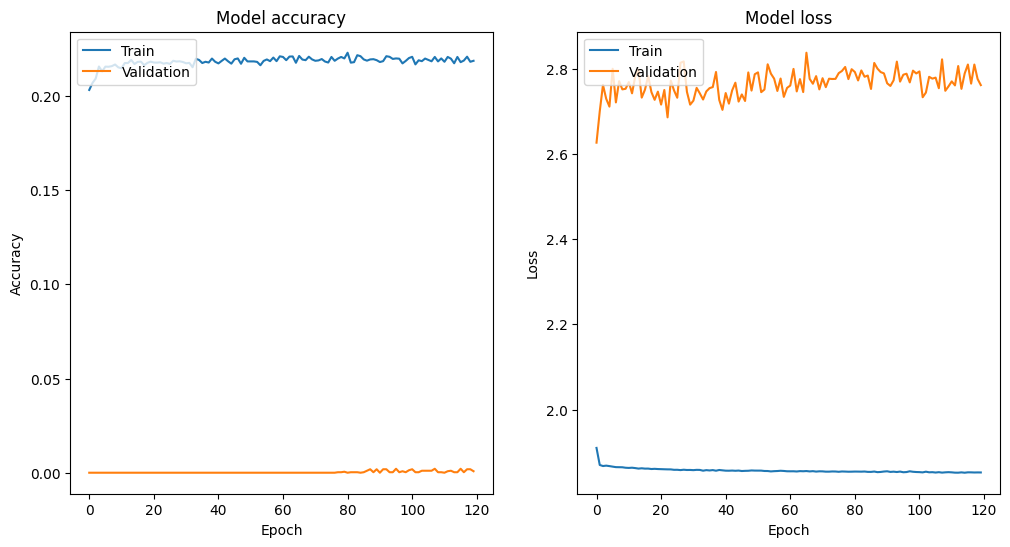

In [25]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load training data

df_train = pd.read_csv('/content/drive/MyDrive/Softcom/Train_Data.csv', sep=',', engine='python')
df_test = pd.read_csv('/content/drive/MyDrive/Softcom/Test_Data.csv', sep=',', engine='python')




df_train = df_train.drop(cols_to_drop, axis=1)

# Class label mapping
label_mapping = {'Happy': 0, 'Surprise': 1, 'Angry': 2, 'Sad': 3, 'Fear': 4, 'Disgust': 5, 'Neutral': 6}
df_train['class_label'] = df_train['class_label'].replace(label_mapping)

# Separate features and labels for training
X_train = df_train.drop('class_label', axis=1).values
y_train = df_train['class_label'].values

# Apply SMOTE for class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# One-hot encode labels
y_categorical = to_categorical(y_resampled)

# Reshape features for LSTM
X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))



# Drop irrelevant columns
df_test = df_test.drop(cols_to_drop, axis=1)

# Class label mapping
df_test['class_label'] = df_test['class_label'].replace(label_mapping)

# Separate features and labels for testing
X_test = df_test.drop('class_label', axis=1).values
y_test = df_test['class_label'].values

# Standardize features for testing
X_test_scaled = scaler.transform(X_test)
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# LSTM Model
lstm = Sequential()
lstm.add(LSTM(100, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]), return_sequences=True))
lstm.add(Dropout(0.1))
lstm.add(LSTM(50, return_sequences=True))
lstm.add(Dropout(0.1))
lstm.add(LSTM(20))
lstm.add(Dropout(0.1))

lstm.add(Dense(y_categorical.shape[1], activation='softmax'))

lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])





# Train the model
history = lstm.fit(X_reshaped, y_categorical, epochs=120, batch_size=128, validation_split=0.2)







# Evaluate the model on the test set
y_pred = lstm.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred_classes)
precision = metrics.precision_score(y_test, y_pred_classes, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred_classes, average='weighted')
recall = metrics.recall_score(y_test, y_pred_classes, average='weighted')

print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", f1_score)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Custom class labels
class_labels = ['Happy', 'Surprise', 'Angry', 'Sad', 'Fear', 'Disgust', 'Neutral']

# Display the confusion matrix using a heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score

# 1. Make predictions with each model and convert them to integers
dt_predictions = dt_clf.predict(Vx).astype(int)
rf_predictions = rf_clf.predict(Vx).astype(int)
ada_predictions = ada_clf.predict(Vx).astype(int)
gb_predictions = gb_clf.predict(Vx).astype(int)
knn_predictions = knn.predict(Vx).astype(int)





lstm_probs= lstm.predict(X_test_reshaped)
bilstm_probs=bilstm.predict(X_test_reshaped)


lstm_probs = np.argmax(lstm_probs, axis=1)
bilstm_probs = np.argmax(bilstm_probs, axis=1)


# 2. Aggregate predictions for hard voting
predictions = np.array([dt_predictions, rf_predictions, ada_predictions, gb_predictions, knn_predictions,lstm_probs,bilstm_probs])

# 3. Perform hard voting
hard_votes = np.apply_along_axis(lambda x: np.bincount(x, minlength=len(np.unique(predictions))).argmax(), arr=predictions, axis=0)

# 4. Evaluate hard voting ensemble
hard_voting_accuracy = np.mean(hard_votes == Vy)
print("Hard Voting Accuracy:", hard_voting_accuracy)



# Calculate Precision
precision = precision_score(Vy, hard_votes, average='weighted')
print("Precision:", precision)

# Calculate Recall
recall = recall_score(Vy, hard_votes, average='weighted')
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(Vy, hard_votes, average='weighted')
print("F1 Score:", f1)










30/30 [==============================] - 0s 2ms/step
Hard Voting Accuracy: 0.3343982960596379
Precision: 0.33751312539793965
Recall: 0.3343982960596379
F1 Score: 0.3283686309912158


In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score
dt_probs = dt_clf.predict_proba(Vx)
rf_probs = rf_clf.predict_proba(Vx)
ada_probs = ada_clf.predict_proba(Vx)
gb_probs = gb_clf.predict_proba(Vx)
knn_probs = knn.predict_proba(Vx)


lstm_probs= lstm.predict(X_test_reshaped)
bilstm_probs=bilstm.predict(X_test_reshaped)




# KNN should already be able to predict probabilities, but if not, adjustments might be needed.

# 2. Aggregate probabilities for soft voting
probabilities = np.array([dt_probs, rf_probs, ada_probs, gb_probs,knn_probs,lstm_probs,bilstm_probs])

# 3. Perform soft voting
soft_votes = np.mean(probabilities, axis=0)

# 4. Determine the final prediction based on the highest probability
soft_voting_predictions = np.argmax(soft_votes, axis=1)

# 5. Evaluate soft voting ensemble
soft_voting_accuracy = np.mean(soft_voting_predictions == Vy)
print("Soft Voting Accuracy:", soft_voting_accuracy)



# Calculate Precision
precision = precision_score(Vy, soft_voting_predictions, average='weighted')
print("Precision:", precision)

# Calculate Recall
recall = recall_score(Vy, soft_voting_predictions, average='weighted')
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(Vy, soft_voting_predictions, average='weighted')
print("F1 Score:", f1)




30/30 [==============================] - 0s 11ms/step
Soft Voting Accuracy: 0.8242811501597445
Precision: 0.8295611840760729
Recall: 0.8242811501597445
F1 Score: 0.8169353991058335


In [ ]:
# Combine all soft predictions



all_soft_predictions = np.mean(np.array([
    dt_probs, rf_probs, ada_probs, gb_probs,  # Assuming these models provide class probabilities
    lstm_probs, bilstm_probs
]), axis=0)

# Perform soft voting
soft_voting_predictions = np.argmax(all_soft_predictions, axis=1)

# Evaluate soft voting ensemble
soft_voting_accuracy = np.mean(soft_voting_predictions == Vy)
print("Soft Voting Accuracy with LSTM and Bi-LSTM:", soft_voting_accuracy)


Soft Voting Accuracy with LSTM and Bi-LSTM: 0.8008519701810437
